### Importing libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import numpy as np
from datetime import datetime as dt

In [4]:
df = pd.read_csv('CitiBike_data_NY.csv', index_col = 0)

In [5]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-08-26,DF208007EE5F9D79,classic_bike,2022-08-26 15:21:44,2022-08-26 15:34:20,Berkeley Pl & 6 Ave,4134.06,Windsor Pl & 8 Ave,3620.02,40.676530,-73.978469,40.660906,-73.983074,member,27.4,111955,both
2022-08-26,4BF322F1E0D74152,classic_bike,2022-08-26 16:08:53,2022-08-26 16:17:48,W 44 St & 11 Ave,6756.05,8 Ave & W 33 St,6450.12,40.762009,-73.996975,40.751551,-73.993934,member,27.4,111955,both
2022-08-26,301E3D811B0D5219,classic_bike,2022-08-26 02:34:33,2022-08-26 08:29:41,9 Ave & W 45 St,6717.06,8 Ave & W 33 St,6450.12,40.760193,-73.991255,40.751551,-73.993934,member,27.4,111955,both
2022-08-26,7D4E20D0A43FCE1F,classic_bike,2022-08-26 11:25:26,2022-08-26 11:52:19,Central Ave & Covert St,4550.05,DeKalb Ave & Hudson Ave,4513.06,40.689290,-73.909510,40.689888,-73.981013,casual,27.4,111955,both
2022-08-26,BB560C341D35EB7D,electric_bike,2022-08-26 19:46:08,2022-08-26 19:48:11,21 St & 43 Ave,6395.01,9 St & 44 Rd,6361.03,40.750525,-73.945948,40.749660,-73.952100,member,27.4,111955,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-06,ED94422A6716A12C,classic_bike,2022-12-06 20:05:14,2022-12-06 20:23:34,58 St & Pier 4,3220.01,21 St & 4 Ave,3668.04,40.646475,-74.026081,40.662584,-73.995554,member,9.3,54229,both
2022-12-06,B52203FF8E70A2F2,classic_bike,2022-12-06 11:52:40,2022-12-06 12:12:44,Columbus Ave & W 72 St,7175.05,E 82 St & East End Ave,7049.04,40.777033,-73.979015,40.772461,-73.946821,member,9.3,54229,both
2022-12-06,EB5E30C734D44D26,classic_bike,2022-12-06 08:24:25,2022-12-06 08:31:10,W 11 St & 6 Ave,5914.03,6 Ave & W 33 St,6364.07,40.735324,-73.998004,40.749013,-73.988484,member,9.3,54229,both


In [8]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
avgTemp               float64
bike_rides_daily        int64
_merge                 object
dtype: object

In [14]:
# Convert 'started_at' and 'ended_at' columns to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [15]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
df['trip_duration'] = df['trip_duration'].apply(lambda x: x if x >= 0 else None)

In [16]:
# Display the first few rows of the DataFrame to check the results
print(df[['ride_id', 'started_at', 'ended_at', 'trip_duration']].head())

                     ride_id          started_at            ended_at  \
date                                                                   
2022-08-26  DF208007EE5F9D79 2022-08-26 15:21:44 2022-08-26 15:34:20   
2022-08-26  4BF322F1E0D74152 2022-08-26 16:08:53 2022-08-26 16:17:48   
2022-08-26  301E3D811B0D5219 2022-08-26 02:34:33 2022-08-26 08:29:41   
2022-08-26  7D4E20D0A43FCE1F 2022-08-26 11:25:26 2022-08-26 11:52:19   
2022-08-26  BB560C341D35EB7D 2022-08-26 19:46:08 2022-08-26 19:48:11   

            trip_duration  
date                       
2022-08-26      12.600000  
2022-08-26       8.916667  
2022-08-26     355.133333  
2022-08-26      26.883333  
2022-08-26       2.050000  


In [17]:
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name       50
start_station_id        624
end_station_name      71773
end_station_id        74867
start_lat                 0
start_lng                 0
end_lat               37516
end_lng               37516
member_casual             0
avgTemp                   0
bike_rides_daily          0
_merge                    0
trip_duration          1206
dtype: int64

In [22]:
#Creating a subset without rows that have missing values
subset_df = df.dropna(subset=[
    'start_station_name', 'start_station_id', 
    'end_station_name', 'end_station_id', 
    'end_lat', 'end_lng', 'trip_duration'
])

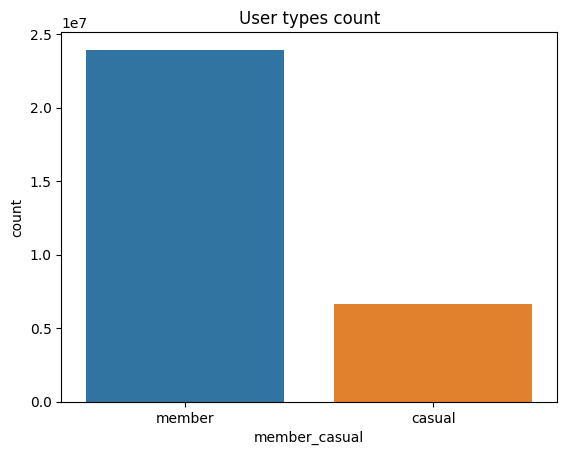

In [24]:
sns.countplot(data = subset_df, x = 'member_casual')
plt.title("User types count")
plt.show()

Column chart showing the user type counts of the member and casual riders.

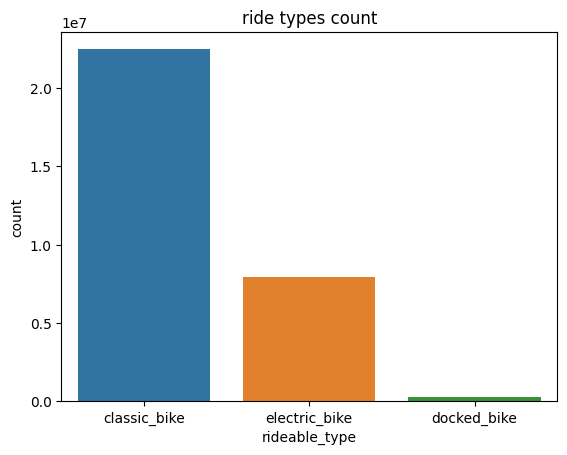

In [33]:
sns.countplot(data = subset_df, x = 'rideable_type')
plt.title("ride types count")
plt.show()

The plot shows the number of people who ride different types of bicycles. There are more classic bikes than electric bikes and docked bikes.

## Bar chart

In [37]:
subset_df.loc[:, 'value'] = 1

/var/folders/1h/3sdj2tc1297dytyhjybm86l00000gn/T/ipykernel_2026/2171536216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[:, 'value'] = 1


In [39]:
subset_df_t = subset_df.groupby('start_station_name')['value'].count().reset_index()

In [41]:
subset_df_t

,start_station_name,value
0,1 Ave & E 110 St,22161
1,1 Ave & E 16 St,69200
2,1 Ave & E 18 St,72742
3,1 Ave & E 30 St,46610
4,1 Ave & E 39 St,54055
...,...,...
1752,Wyckoff Ave & Gates Ave,16888
1753,Wyckoff St & 3 Ave,255
1754,Wyckoff St & Nevins St,11728
1755,Wythe Ave & Metropolitan Ave,67734


In [43]:
top20 = subset_df_t.nlargest(20, 'value')

In [45]:
top20

,start_station_name,value
1583,W 21 St & 6 Ave,131475
1714,West St & Chambers St,126019
495,Broadway & W 58 St,117528
286,6 Ave & W 33 St,109325
8,1 Ave & E 68 St,108238
461,Broadway & E 14 St,100895
485,Broadway & W 25 St,100554
1507,University Pl & E 14 St,99905
463,Broadway & E 21 St,97790
1599,W 31 St & 7 Ave,95966


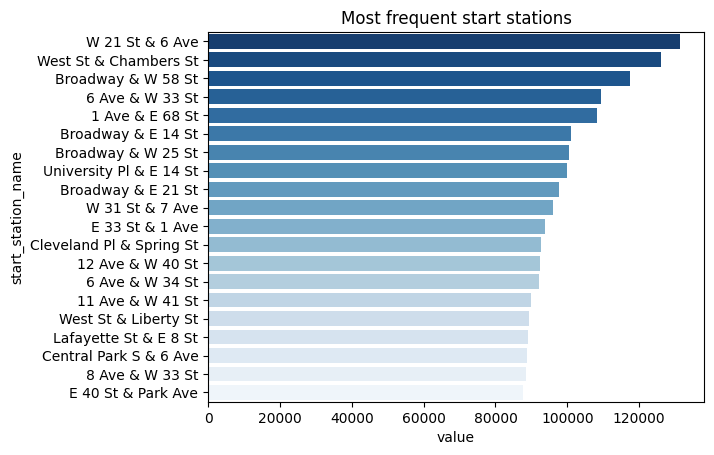

In [47]:
#Creating bar chart of the top 20 starting stations
sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("Blues_r"))
plt.title("Most frequent start stations")
plt.show()

A bar chart displaying the top 20 starting points in 2022. The station with the most rides is W 21 St & 6 Ave, followed by West St & Chambers St.

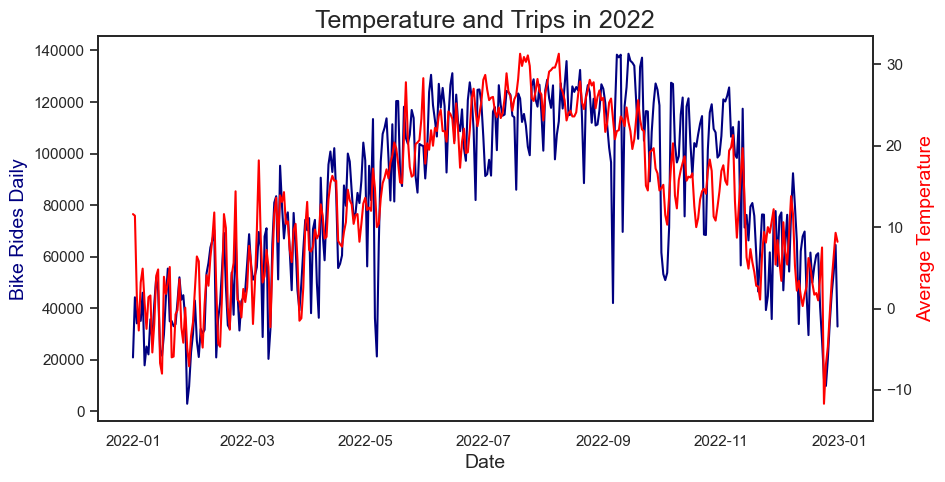

In [50]:
df.index = pd.to_datetime(df.index)  # Ensure index is datetime

# Set Seaborn style
sns.set(style="white")

# Create figure and axis objects with subplots()
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting bike rides data
sns.lineplot(data=df, x=df.index, y='bike_rides_daily', ax=ax1, color="navy", errorbar=None)
ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("Bike Rides Daily", color="navy", fontsize=14)

# Create a twin axis for the temperature plot
ax2 = ax1.twinx()

# Plotting temperature data
sns.lineplot(data=df, x=df.index, y='avgTemp', ax=ax2, color="red", errorbar=None)
ax2.set_ylabel("Average Temperature", color="red", fontsize=14)

# Set the title
plt.title('Temperature and Trips in 2022', fontsize=18)
plt.show()

The graph above shows line chart with dual axes. The red line represents the average temperatures in New York in 2022, and the blue line represents the number of trips taken during the year.

### Box Plot

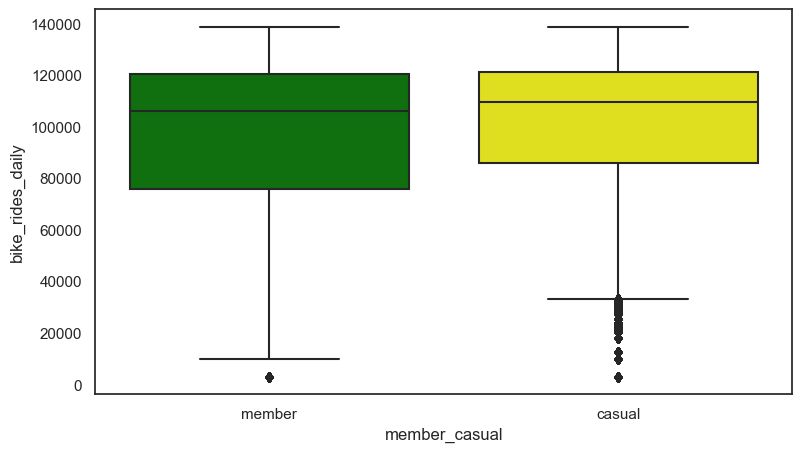

In [52]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'member_casual', y = 'bike_rides_daily', data = subset_df, palette = {'member': 'green', 'casual': 'yellow'})
plt.show()

The box plot illustrates key differences in daily bike ride patterns for members and casual riders. Notably, the green box for members shows a wider spread than the yellow box for casual riders, indicating greater variability in ride lengths among members. Additionally, the median ride lengths are generally higher for members, as shown by the center line within their box. The plot also reveals outliers on both ends for both groups, suggesting that there are riders in each category who take exceptionally long or short rides.

In [66]:
#plot df
plot_df=subset_df.loc[subset_df["trip_duration"]<100]

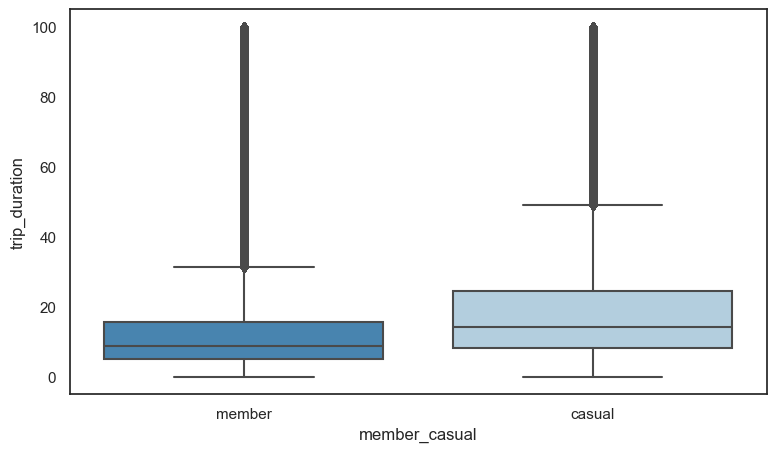

In [67]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'member_casual', y = 'trip_duration', data = plot_df, palette = "Blues_r")
plt.show()

The box plot reveals differences in trip durations based on membership status (member/casual) for a bike-sharing program. It shows that the spread of the light blue box for casual riders is wider than the blue box for members, indicating greater variability in trip durations among casual riders. Additionally, the median trip duration, marked by the center line within the blue box, is higher for members, suggesting that members typically take longer trips on average. Both groups exhibit outliers on either end, with potentially more outliers among casual riders due to the wider spread of the blue box, indicating the presence of riders who take exceptionally short or long trips in both categories.

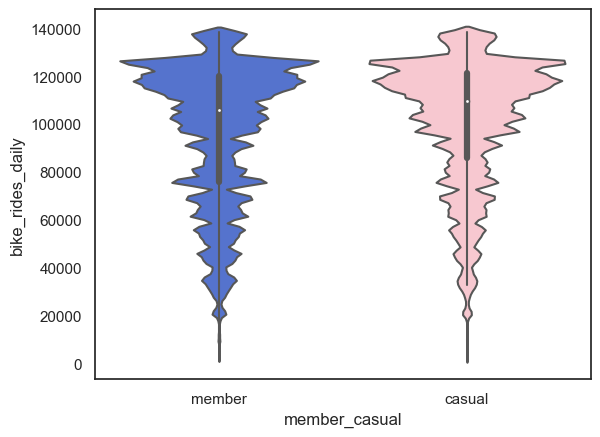

In [70]:
sns.violinplot(x = 'member_casual', y = 'bike_rides_daily', data = plot_df, palette = {'member': 'royalblue', 'casual': 'pink'})
plt.show()

The violin plot shows the distribution of bike rides per day for casual and member cyclists.

## Facet grid

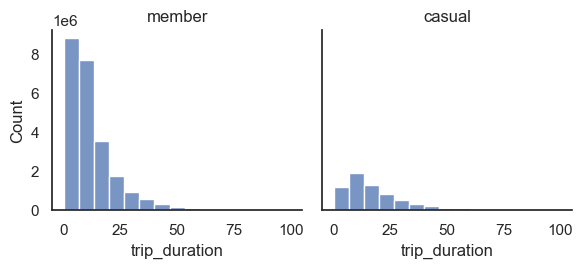

In [82]:
grid = sns.FacetGrid(plot_df, col="member_casual")
grid.map(sns.histplot, "trip_duration", bins=15)

# Set the titles of the subplots
grid.set_titles(col_template="{col_name}")

# Adjust the labels to be 'Member' and 'Casual' instead of the full column name
grid.set_titles(col_template="{col_name}".replace("member_casual", "Member").replace("member_casual", "Casual"))

plt.show()

The histograms indicate that 'member' users typically have shorter trip durations than 'casual' users, with the majority of 'member' trips lasting under 25 minutes. In contrast, 'casual' trips are more varied in length, generally extending beyond 25 minutes. This visualization suggests that casual users may utilize the bike-sharing service for longer, more leisurely rides, whereas members likely use it for quicker, routine commutes. These insights into user behavior highlight distinct patterns in how each group utilizes the bike-sharing program.

In [99]:
subset_df.to_csv('NY_CitiBike_data.csv')